## NLP & MultiClass Classification: Corporate messaging
https://www.crowdflower.com/data-for-everyone/

** Dataset Information: **

- 3118 corporations messages on social media

** Attribute Information:**

- _unit_id              
- _golden                
- _unit_state           
- _trusted_judgments   
- _last_judgment_at     
- category               
- category:confidence    
- category_gold         
- id                     
- screenname            
- text                 

** Objective of this project **

- classify statements as information, dialog, or action 

# Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv('Corporate-messaging-DFE.csv', encoding='latin')
pd.set_option('display.max_colwidth', -1)
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,category,category:confidence,category_gold,id,screenname,text
0,662822308,False,finalized,3,2/18/15 4:31,Information,1.0,NaN,4.365280e+17,Barclays,Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference http://t.co/Ge9Lp7hpyG
1,662822309,False,finalized,3,2/18/15 13:55,Information,1.0,NaN,3.860130e+17,Barclays,Barclays announces result of Rights Issue http://t.co/LbIqqh3wwG
2,662822310,False,finalized,3,2/18/15 8:43,Information,1.0,NaN,3.795800e+17,Barclays,Barclays publishes its prospectus for its å£5.8bn Rights Issue: http://t.co/YZk24iE8G6
3,662822311,False,finalized,3,2/18/15 9:13,Information,1.0,NaN,3.675300e+17,Barclays,Barclays Group Finance Director Chris Lucas is to step down at the end of the week due to ill health http://t.co/nkuHoAfnSD
4,662822312,False,finalized,3,2/18/15 6:48,Information,1.0,NaN,3.603850e+17,Barclays,Barclays announces that Irene McDermott Brown has been appointed as Group Human Resources Director http://t.co/c3fNGY6NMT


In [3]:
df['text'].tail()

3113    Wishing you a happy and healthy Thanksgiving. #BeWell                                                                                              
3114    WouldnÌ¢âÂã¢t it be great if your oven recognised your food, and knew precisely how to cook it? http://t.co/c7NWehROi4                           
3115    Yesterday, these #HealthyKids lit up Broadway with #Nestle, @iaaforg and some sporting stars: http://t.co/YdtBj60Ofz                               
3116    Yo-Jelly, Danone new brand in South Africa : the fun taste sensation of jelly &amp; the health benefits of yoghurt ! #Danone #Yojelly              
3117    Z Bhutta: Problems with food&amp;land systems include land acquistion, commodity speculation affecting food prices&amp;lack of discussion #NINS2013
Name: text, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 11 columns):
_unit_id               3118 non-null int64
_golden                3118 non-null bool
_unit_state            3118 non-null object
_trusted_judgments     3118 non-null int64
_last_judgment_at      2811 non-null object
category               3118 non-null object
category:confidence    3118 non-null float64
category_gold          307 non-null object
id                     3118 non-null float64
screenname             3118 non-null object
text                   3118 non-null object
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 246.7+ KB


In [5]:
df.describe()

,_unit_id,_trusted_judgments,category:confidence,id
count,3.118000e+03,3118.000000,3118.000000,3.118000e+03
mean,6.642499e+08,3.435536,0.925460,3.085197e+17
std,4.306949e+06,1.391406,0.147874,1.436658e+17
min,6.628223e+08,3.000000,0.333800,2.222122e+09
25%,6.628232e+08,3.000000,1.000000,2.336488e+17
50%,6.628240e+08,3.000000,1.000000,3.473025e+17
75%,6.628248e+08,3.000000,1.000000,4.231435e+17
max,6.772783e+08,11.000000,1.000000,4.797360e+17


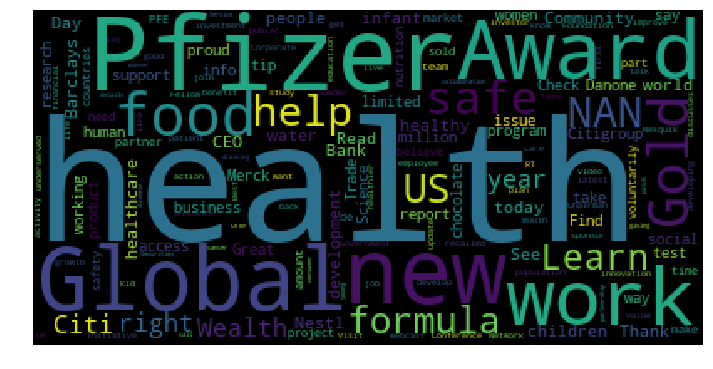

In [6]:
# word cloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

def plot_word_cloud():
    text = df['text'].to_string() 
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub('&amp', ' ', text)    
    text = re.sub('[^a-zA-Z]', ' ', text)

    wordcloud = WordCloud(
        relative_scaling=0.5,
        collocations=False,
        stopwords=set(stopwords.words('english'))).generate(text)

    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

plot_word_cloud()

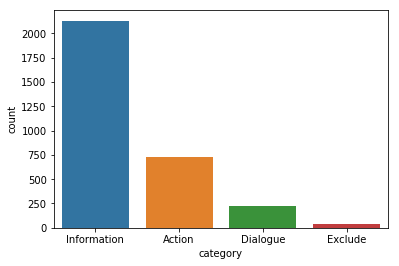

In [7]:
# inspect category
sns.countplot(df['category'])

In [8]:
# drop 'Exclude'
df = df[df['category'] != 'Exclude']
df.reset_index(inplace=True)

In [9]:
df['category'].value_counts()

Information    2129
Action         724 
Dialogue       226 
Name: category, dtype: int64

# Text preprocessing

** Clean Text**

In [10]:
def clean_text(text):
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', text)
    text = re.sub(r'@\S+', ' ', text)
    text = re.sub(r'#\S+', ' ', text)
    text = re.sub('&amp', ' ', text)
    return text

df['clean_text'] = df['text'].apply(clean_text)

#### Split Train Test sets

In [11]:
seed = 1234
np.random.seed(seed)

X = df['clean_text']
y = df['category'].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=seed)                                                    
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
np.unique(y_train, return_counts=True)

(2463,) (616,) (2463,) (616,)


(array(['Action', 'Dialogue', 'Information'], dtype=object),
 array([ 579,  181, 1703], dtype=int64))

** Create BoW**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(strip_accents='unicode',
                      stop_words={'english'},
                      #ngram_range=(1,2),
                      min_df=3, #max_df=0.9,
                      sublinear_tf=True)
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)
print(X_train.shape, X_test.shape)

(2463, 1850) (616, 1850)


## Model Train

Accuracy: 98.7%


             precision    recall  f1-score   support

     Action       0.97      0.99      0.98       579
   Dialogue       0.98      0.94      0.96       181
Information       0.99      0.99      0.99      1703

avg / total       0.99      0.99      0.99      2463



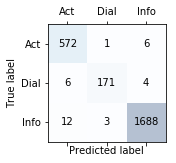

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# train model
model = RandomForestClassifier(n_estimators=100, random_state=seed)
model.fit(X_train,y_train)

#accuracy score
y_pred_train = model.predict(X_train)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_train,y_pred_train)*100))

#classification report
print('\n')
print(classification_report(y_train, y_pred_train))

#confusion matrix
confmat = confusion_matrix(y_train, y_pred_train)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xticks((0,1,2), ('Act', 'Dial', 'Info'))
plt.yticks((0,1,2), ('Act', 'Dial', 'Info'))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Model Evaluation with Test set

Accuracy: 90.6%


             precision    recall  f1-score   support

     Action       0.86      0.79      0.83       145
   Dialogue       0.92      0.73      0.81        45
Information       0.92      0.96      0.94       426

avg / total       0.90      0.91      0.90       616



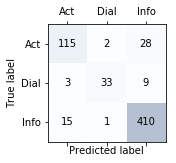

In [15]:
# predict class with test set (new, unseen)
y_pred_test = model.predict(X_test)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_test,y_pred_test)*100))

#classification report
print('\n')
print(classification_report(y_test, y_pred_test))

#confusion matrix
confmat = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xticks((0,1,2), ('Act', 'Dial', 'Info'))
plt.yticks((0,1,2), ('Act', 'Dial', 'Info'))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()